<a href="https://colab.research.google.com/github/DaniilAszn/Applied_statistics/blob/main/1_2_%D0%9E%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

## 1. –î–∞–Ω–Ω—ã–µ

In [ ]:
df = pd.read_csv('youtube_data_short.csv', sep='\t')
print(df.shape) # —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

(19124, 10)


In [ ]:
df.head() # –ø–µ—Ä–≤—ã–µ –ø—è—Ç—å —Å—Ç—Ä–æ–∫ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ

title  commentCount  \
0                          "#2–ú–∞—à–∏ "–°–≤–æ–±–æ–¥–Ω—ã–µ –ª–∏–Ω–∏–∏"          34.0   
1          "ALARM" –°–ï–†–ì–ï–ô –õ–ê–ó–ê–†–ï–í ( SERGEY LAZAREV )           NaN   
2  "EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MIC...          26.0   
3             "Earth song" –ø—Ä–µ–º–∏—è –ú–£–ó-—Ç–í 2010 (LIVE)          12.0   
4                     "FAKE" –°–ï–†–ì–ï–ô –õ–ê–ó–ê–†–ï–í (SERGEY)          46.0   

   dislikeCount  likeCount music_style performer  viewCount  \
0          43.0     1402.0       popsa     2–º–∞—à–∏   214301.0   
1         690.0    10532.0       popsa   –ª–∞–∑–∞—Ä–µ–≤  2221419.0   
2          10.0      269.0       popsa   –ª–∞–∑–∞—Ä–µ–≤    40327.0   
3           7.0      163.0       popsa   –ª–∞–∑–∞—Ä–µ–≤    11907.0   
4          19.0      597.0       popsa   –ª–∞–∑–∞—Ä–µ–≤    91483.0   

   commentators_uniq  comments_obscene_cnt  video_age  
0               24.0                   0.0       1141  
1                NaN                   NaN       3217  
2               23.0                   0.0       3546  
3               11.0                   0.0       3189  
4               33.0                   1.0       3361

In [ ]:
df.dtypes # —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

## 2. –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏

In [ ]:
df['likeCount']

0         1402.0
1        10532.0
2          269.0
3          163.0
4          597.0
          ...   
19119       11.0
19120     1837.0
19121    30603.0
19122      260.0
19123       22.0
Name: likeCount, Length: 19124, dtype: float64

In [ ]:
# index
df['likeCount'].index

RangeIndex(start=0, stop=19124, step=1)

In [ ]:
# values
df['likeCount'].values

array([1.4020e+03, 1.0532e+04, 2.6900e+02, ..., 3.0603e+04, 2.6000e+02,
       2.2000e+01])

In [ ]:
# –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
df.likeCount.max() # df['likeCount'].max()

1686810.0

In [ ]:
# –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
df['likeCount'].min()

0.0

In [ ]:
mx = df['likeCount'].max()
mx

1686810.0

In [ ]:
df['likeCount'] == mx

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Name: likeCount, Length: 19124, dtype: bool

In [ ]:
# –ø–æ–∏—Å–∫ —Å—Ç—Ä–æ–∫–∏, —É –∫–æ—Ç–æ—Ä–æ–π –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∞–π–∫–æ–≤ (—Å—Ä–µ–∑)
df[df['likeCount'] == mx]

title  commentCount  dislikeCount  likeCount  \
18649  –≠–ª–¥–∂–µ–π & Feduk - –†–æ–∑–æ–≤–æ–µ –≤–∏–Ω–æ      191702.0      151772.0  1686810.0   

      music_style performer    viewCount  commentators_uniq  \
18649         rap     feduk  208753182.0             3702.0   

       comments_obscene_cnt  video_age  
18649                 183.0        485

–ú–µ—Ä—ã —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏

In [ ]:
df['likeCount'].mean()

5735.014482758621

In [ ]:
df['likeCount'].median()

100.0

–ú–µ–¥–∏–∞–Ω–∞ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ => –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –∏–º–µ—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã

–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞

<Axes: >

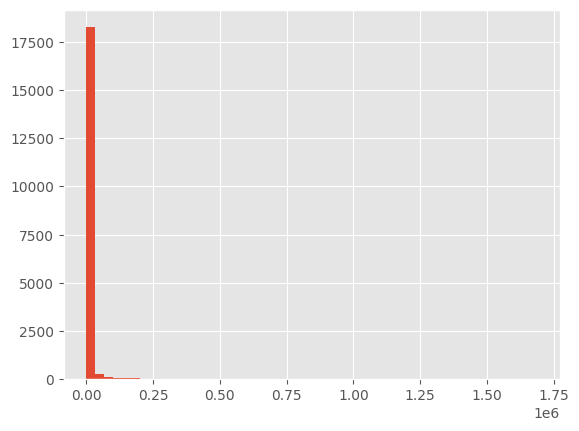

In [ ]:
df['likeCount'].hist(bins=50)

<Axes: >

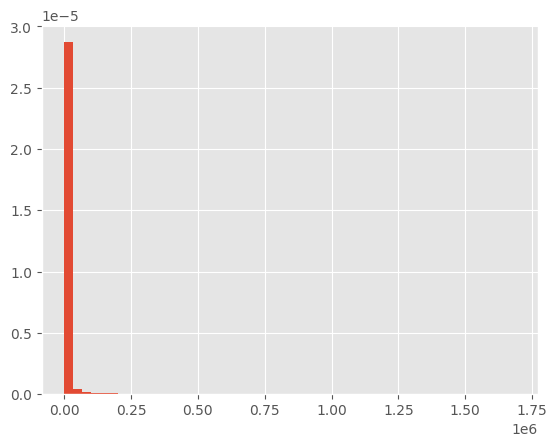

In [ ]:
df['likeCount'].hist(bins=50, density=True)

<Axes: >

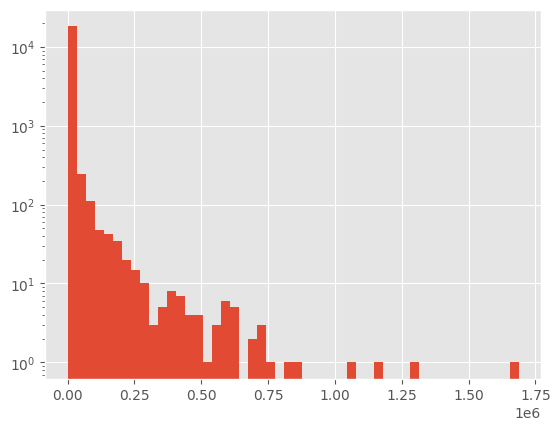

In [ ]:
# –ß—Ç–æ–± –ª—É—á—à–µ —Ä–∞–∑–≥–ª—è–¥–µ—Ç—å –≤—ã–±—Ä–æ—Å—ã, –ø–µ—Ä–µ–π–¥—ë–º –∫ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —à–∫–∞–ª–µ
df['likeCount'].hist(bins=50, log=True)

–ú–µ—Ä—ã —Ä–∞–∑–±—Ä–æ—Å–∞

In [ ]:
# –¥–∏—Å–ø–µ—Ä—Å–∏—è
df['likeCount'].var(ddof=0)

1513365309.7446709

In [ ]:
df['likeCount'].var(ddof=1) # –Ω–µ—Å–º–µ—â—ë–Ω–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç

1513445598.6358452

In [ ]:
# —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
df['likeCount'].std(ddof=0)

38901.99621799209

In [ ]:
df['likeCount'].std(ddof=1) # –Ω–µ—Å–º–µ—â—ë–Ω–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç

38903.02814223907

–ö–≤–∞–Ω—Ç–∏–ª–∏

In [ ]:
df['likeCount'].quantile(0.99)

128146.6499999979

–í—ã—Ö–æ–¥–∏—Ç, —á—Ç–æ —É 99% –≤–∏–¥–µ–æ –∏–∑ –≤—ã–±–æ—Ä–∫–∏ –º–µ–Ω—å—à–µ 128146 –ª–∞–π–∫–æ–≤, –∞ —É 1% - –±–æ–ª—å—à–µ

In [ ]:
q = df['likeCount'].quantile(0.99)
x = df[df['likeCount'] > q].music_style
x.value_counts

<bound method IndexOpsMixin.value_counts of 186      popsa
205      popsa
288        rap
305      popsa
306      popsa
         ...  
18672      rap
18680      rap
18692      rap
18693      rap
18698      rap
Name: music_style, Length: 189, dtype: object>

–í–°–Å –ò –°–†–ê–ó–£

In [ ]:
df.describe()

commentCount   dislikeCount     likeCount     viewCount  \
count   18914.000000   18850.000000  1.885000e+04  1.912300e+04   
mean      394.026065     745.344297  5.735014e+03  8.436486e+05   
std      4200.463284    9339.777800  3.890303e+04  6.382348e+06   
min         0.000000       0.000000  0.000000e+00  0.000000e+00   
25%         0.000000       1.000000  1.800000e+01  1.915000e+03   
50%         5.000000       5.000000  1.000000e+02  1.135300e+04   
75%        35.000000      38.000000  6.367500e+02  8.180900e+04   
max    303077.000000  640698.000000  1.686810e+06  2.720477e+08   

       commentators_uniq  comments_obscene_cnt     video_age  
count       12314.000000          12314.000000  19124.000000  
mean          131.594608              8.952899   1389.772642  
std           333.584804             37.887947   1054.261698  
min             1.000000              0.000000      0.000000  
25%             4.000000              0.000000    378.000000  
50%            13.000000              0.000000   1213.000000  
75%            61.000000              2.000000   2218.000000  
max          3702.000000            693.000000   4574.000000

In [ ]:
df.describe(include='object')

title music_style  \
count                                               19124       19124   
unique                                              18029           7   
top     –ê–ª–µ–∫—Å–µ–π –ö–æ—Ä—Ç–Ω–µ–≤ –∏ –í–∞–ª–¥–∏—Å –ü–µ–ª—å—à –≤ –ø—Ä–æ–µ–∫—Ç–µ ¬´–î–≤–µ ...        rock   
freq                                                   11        5888   

       performer  
count      19124  
unique       111  
top     –Ω–∏–∫–æ–ª–∞–µ–≤  
freq         566

## 3. –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞

–ü–æ—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –ª–∞–π–∫–æ–≤ –¥–ª—è —Ä—ç–ø—á–∏–Ω—ã

In [ ]:
df[df['music_style'] == 'rap']

title  commentCount  \
232                   #BSM - –ë—É–¥—å —Å–æ–±–æ–π (official video)         156.0   
233                            #BSM - –ë—É–¥—å —Å–æ–±–æ–π (track)          24.0   
234                                     #BSM COMING SOON          27.0   
235                                       #GazgolderLive           0.0   
236                                       #GazgolderLive           0.0   
...                                                  ...           ...   
19034                                  –±—Ç–ª –±—É–ª–≥–∞—Ä–∏ —Ñ–µ–¥—É–∫          12.0   
19047             –≥.–ù–µ–∞–ø–æ–ª—å, –ò—Ç–∞–ª–∏—è 2010 –≥–æ–¥ –ö–∞—Ä–∏–Ω–∞ –ö–æ–∫—Å           6.0   
19078                                       –ª–µ—Ç–Ω–∏–π —Ñ—Ä–∏—Å—Ç          13.0   
19101  –ø—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏—è –∞–ª—å–±–æ–º–∞ –¢–∏–º–∞—Ç–∏ The Boss –≤ –ö–∏–µ–≤–µ (–£...           3.0   
19121                                    „É¢„Çπ„ÇØ„ÉØ„É©„Ç§„Éñ„Ç∑„Éß„Éº ' 17        4872.0   

       dislikeCount  likeCount music_style  performer  viewCount  \
232          1033.0     1859.0         rap     —Ç–∏–º–∞—Ç–∏   558557.0   
233            95.0      230.0         rap     —Ç–∏–º–∞—Ç–∏    60981.0   
234            52.0      225.0         rap     —Ç–∏–º–∞—Ç–∏    68296.0   
235            38.0      108.0         rap  gazgolder        0.0   
236            49.0      264.0         rap  gazgolder        0.0   
...             ...        ...         ...        ...        ...   
19034           4.0      117.0         rap      feduk    14137.0   
19047           5.0       31.0         rap     —Ç–∏–º–∞—Ç–∏    21319.0   
19078           7.0      119.0         rap      feduk     9129.0   
19101           7.0       29.0         rap     —Ç–∏–º–∞—Ç–∏    14927.0   
19121       15494.0    30603.0         rap     —ç–ª–¥–∂–µ–π  1187340.0   

       commentators_uniq  comments_obscene_cnt  video_age  
232                128.0                  20.0       2689  
233                 22.0                   0.0       2699  
234                 19.0                   2.0       2713  
235                  NaN                   NaN        377  
236                  NaN                   NaN        378  
...                  ...                   ...        ...  
19034               10.0                   0.0       2745  
19047                NaN                   NaN       3074  
19078                9.0                   0.0       2560  
19101                2.0                   0.0       3319  
19121             1788.0                 352.0        339  

[2028 rows x 10 columns]

In [ ]:
# –∏–∑ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞, –≥–¥–µ —á–∏—Å—Ç–æ —Ä—ç–ø, –º—ã –±–µ—Ä—ë–º –∫–æ–ª–æ–Ω–∫—É likeCount –∏ —Å—á–∏–∞—Ç–µ–º —Å—Ä–µ–¥–Ω–µ–µ
df[df['music_style'] == 'rap']['likeCount'].mean()

26802.456253089473

–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∞–π–∫–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∂–∞–Ω—Ä–∞

In [ ]:
Genre = set(df['music_style'])

for genre in Genre:
    like_c = df[df['music_style'] == genre]['likeCount'].mean()
    print(f'{genre}: {like_c}')

shanson: 440.39056420233464
popsa: 7492.273791654158
estrada: 938.686661604657
rap: 26802.456253089473
classic: 28663.333333333332
indi: 2471.8422991893885
rock: 2132.88706083976


In [ ]:
# group by

df.groupby('music_style')['likeCount'].mean()

music_style
classic    28663.333333
estrada      938.686662
indi        2471.842299
popsa       7492.273792
rap        26802.456253
rock        2132.887061
shanson      440.390564
Name: likeCount, dtype: float64

–ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ:
1. –∞–≥—Ä–µ–≥–∞—Ç–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π

In [ ]:
df.groupby('music_style')['likeCount'].agg(['mean', 'count'])

mean  count
music_style                     
classic      28663.333333    297
estrada        938.686662   3951
indi          2471.842299   1357
popsa         7492.273792   3331
rap          26802.456253   2023
rock          2132.887061   5835
shanson        440.390564   2056

–ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ:
1. –∞–≥—Ä–µ–≥–∞—Ç–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π
2. —à—Ç—É–∫ –¥–ª—è —á–µ–≥–æ –∞–≥—Ä–µ–≥–∏—Ä—É–µ–º

In [ ]:
df.groupby('music_style')[['likeCount', 'dislikeCount']].agg(['mean', 'count'])

likeCount       dislikeCount      
                     mean count         mean count
music_style                                       
classic      28663.333333   297  1236.228956   297
estrada        938.686662  3951   173.565933  3951
indi          2471.842299  1357   220.419307  1357
popsa         7492.273792  3331   790.161513  3331
rap          26802.456253  2023  4099.575383  2023
rock          2132.887061  5835   287.698201  5835
shanson        440.390564  2056    45.488327  2056

–ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ:
1. –∞–≥—Ä–µ–≥–∞—Ç–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π
2. —à—Ç—É–∫ –¥–ª—è —á–µ–≥–æ –∞–≥—Ä–µ–≥–∏—Ä—É–µ–º
3. –ø–æ–ª–µ–π –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏

In [ ]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount']].agg(['mean', 'count'])

likeCount       dislikeCount      
                                       mean count         mean count
music_style performer                                               
classic     classical_channel  28663.333333   297  1236.228956   297
estrada     –∞–≥—É—Ç–∏–Ω                39.333333     3     4.666667     3
            –±–∞—Å–∫–æ–≤              1582.721311   122   233.270492   122
            –±—É–π–Ω–æ–≤                 2.795455    44     0.727273    44
            –≤–∞–µ–Ω–≥–∞               133.773360   503     9.310139   503
...                                     ...   ...          ...   ...
shanson     –∂–µ–∫–∞                 505.681159   138    49.702899   138
            –∏—Ä–∏–Ω–∞_–∫—Ä—É–≥          1520.352381   105   185.847619   105
            –º–∏—Ö–∞–∏–ª_–∫—Ä—É–≥          418.111340   485    44.216495   485
            —Ç—Ä–æ—Ñ–∏–º–æ–≤             252.857759   232    15.478448   232
            —à—É—Ñ—É—Ç–∏–Ω—Å–∫–∏–π          357.132565   347    17.040346   347

[111 rows x 4 columns]

In [ ]:
# –µ—Å—Ç—å –ª–∏ –ø–æ–¥ –≤–∏–¥–µ–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
df['is_comment'] = 1 * (df['commentators_uniq'] > 0)
(df['commentators_uniq'] > 0).sum()
df['is_comment'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        1
3        1
4        1
        ..
19119    0
19120    1
19121    1
19122    1
19123    0
Name: is_comment, Length: 19124, dtype: int64>

## 4. Apply

–í—ã–≤–µ–¥–µ–º –¥–ª–∏–Ω—É –∫–∞–∂–¥–æ–π –ø–µ—Å–Ω–∏

In [ ]:
# apply

df['title'].apply(len)[:10]

0    25
1    41
2    75
3    38
4    30
5    48
6    36
7    43
8    29
9    56
Name: title, dtype: int64

In [ ]:
df['title'].apply(len).mean() # —Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –Ω–∞–∑–≤–∞–Ω–∏—è

35.293871574984315

Apply –º–æ–∂–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Å–∞–º–∏ –Ω–∞–ø–∏—Å–∞–ª–∏

In [ ]:
def firstSymbol(string_name: str) -> str:
    return string_name[0]

print(firstSymbol('Danya'))

D


In [ ]:
df['title'].apply(firstSymbol)

0        "
1        "
2        "
3        "
4        "
        ..
19119    ‚ô´
19120    ‚ù§
19121    „É¢
19122    Ëàû
19123    üéÑ
Name: title, Length: 19124, dtype: object

In [ ]:
df['title'].apply(lambda string_name: string_name[0])

0        "
1        "
2        "
3        "
4        "
        ..
19119    ‚ô´
19120    ‚ù§
19121    „É¢
19122    Ëàû
19123    üéÑ
Name: title, Length: 19124, dtype: object

## 5. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã

(array([ 251.,  297.,  312.,  450.,  595.,  879., 1091.,  712.,  609.,
         304.,  377.,  267.,  191.,  289.,  243.,  275.,  264.,  212.,
         262.,  209.,  270.,  248.,  209.,  189.,  290.,  190.,  216.,
         225.,  142.,  183.,  220.,  294.,  402.,  462.,  379.,  176.,
         152.,  104.,  286.,  218.,  270.,  104.,  166.,  202.,  125.,
         104.,  152.,  182.,  198.,  144.,  110.,  159.,  150.,  113.,
         157.,  117.,  173.,  200.,  168.,  239.,  115.,  111.,  235.,
         257.,  288.,  187.,  244.,  152.,   94.,  206.,  139.,  105.,
          83.,  139.,  126.,   99.,   39.,   50.,   29.,   27.,   21.,
          16.,   10.,   55.,    9.,    7.,   11.,   18.,    6.,    6.,
           2.,    9.,   14.,   13.,    6.,    7.,    9.,    0.,    0.,
           3.]),
 array([   0.  ,   45.74,   91.48,  137.22,  182.96,  228.7 ,  274.44,
         320.18,  365.92,  411.66,  457.4 ,  503.14,  548.88,  594.62,
         640.36,  686.1 ,  731.84,  777.58,  823.32,  869.06

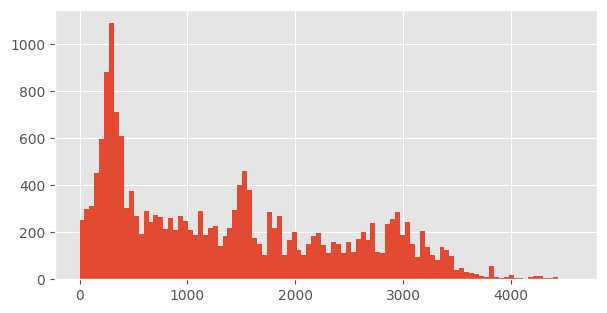

In [ ]:
plt.figure(figsize=(7, 3.5))
plt.hist(df['video_age'], bins=100)

Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –≤–∏–¥–µ–æ')

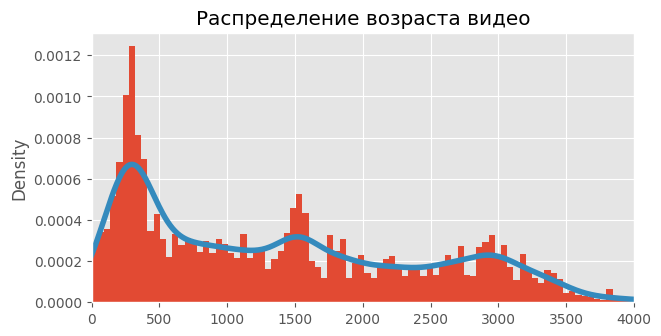

In [ ]:
plt.figure(figsize=(7, 3.5))

df['video_age'].hist(bins=100, density=True)
df['video_age'].plot(kind='kde', linewidth=4)
plt.xlim(0, 4000)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –≤–∏–¥–µ–æ')

array([[<Axes: title={'center': 'viewCount'}>,
        <Axes: title={'center': 'likeCount'}>],
       [<Axes: title={'center': 'dislikeCount'}>, <Axes: >]], dtype=object)

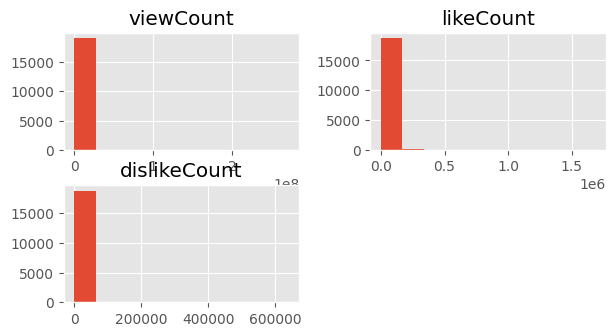

In [ ]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(7, 3.5))

–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ —É

array([[<Axes: title={'center': 'viewCount'}>,
        <Axes: title={'center': 'likeCount'}>],
       [<Axes: title={'center': 'dislikeCount'}>, <Axes: >]], dtype=object)

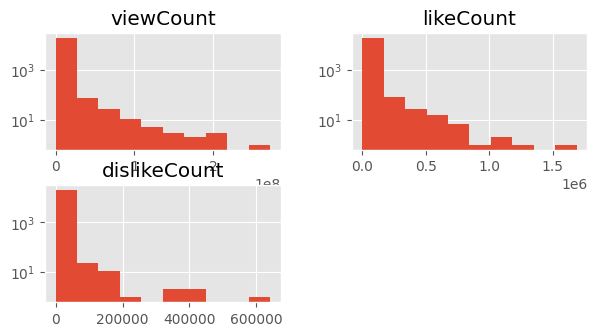

In [ ]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(7, 3.5), log=True)

–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ —Ö

In [ ]:
df[columns].apply(lambda x: np.log(x + 1))

viewCount  likeCount  dislikeCount
0      12.275142   7.246368      3.784190
1      14.613657   9.262268      6.538140
2      10.604801   5.598422      2.397895
3       9.384966   5.099866      2.079442
4      11.423919   6.393591      2.995732
...          ...        ...           ...
19119   7.010312   2.484907      0.000000
19120  12.878601   7.516433      6.068426
19121  13.987227  10.328886      9.648273
19122   9.225032   5.564520      2.397895
19123   7.356918   3.135494      0.000000

[19124 rows x 3 columns]

array([[<Axes: title={'center': 'viewCount'}>,
        <Axes: title={'center': 'likeCount'}>],
       [<Axes: title={'center': 'dislikeCount'}>, <Axes: >]], dtype=object)

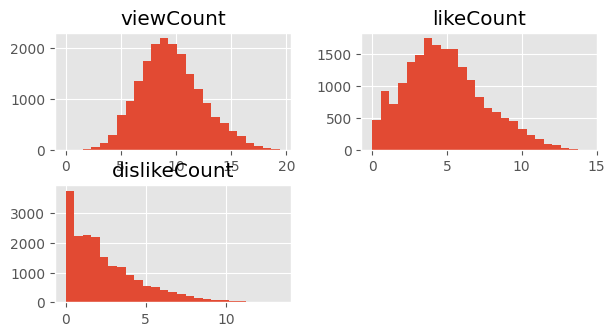

In [ ]:
df[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(7, 3.5), bins=25)

## 6. –£—Å–∞—Ç—ã–µ —è—â–∏–∫–∏

In [ ]:
df_log = df[columns].apply(lambda x: np.log(x + 1))
df_log['music_style'] = df['music_style']
df_log.head()

viewCount  likeCount  dislikeCount music_style
0  12.275142   7.246368      3.784190       popsa
1  14.613657   9.262268      6.538140       popsa
2  10.604801   5.598422      2.397895       popsa
3   9.384966   5.099866      2.079442       popsa
4  11.423919   6.393591      2.995732       popsa

Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∞–π–∫–æ–≤')

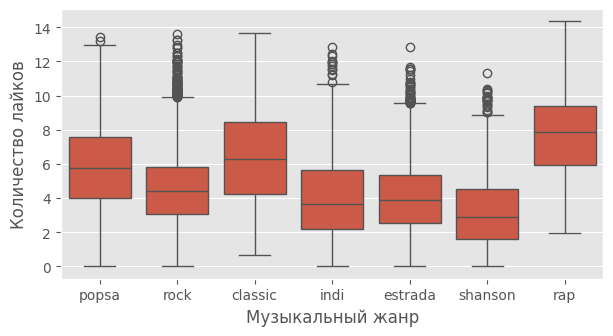

In [ ]:
plt.figure(figsize=(7, 3.5))
sns.boxplot(x='music_style', y='likeCount', data=df_log)
plt.xlabel('–ú—É–∑—ã–∫–∞–ª—å–Ω—ã–π –∂–∞–Ω—Ä')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∞–π–∫–æ–≤')

–Ω–µ —Å–æ–≤—Å–µ–º —è—â–∏–∫, –Ω–µ —Å–æ–≤—Å–µ–º —Å —É—Å–∞–º–∏

Text(0, 0.5, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∞–π–∫–æ–≤')

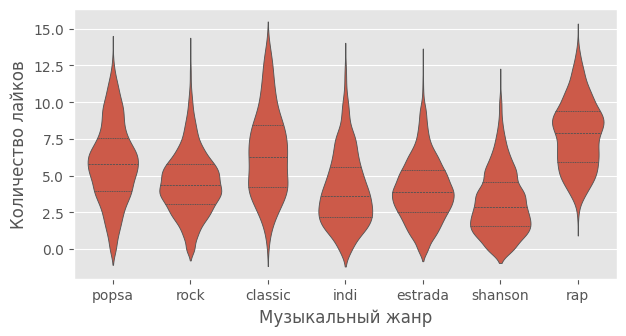

In [ ]:
plt.figure(figsize=(7, 3.5))
sns.violinplot(x='music_style', y='likeCount', data=df_log, inner='quartile')
plt.xlabel('–ú—É–∑—ã–∫–∞–ª—å–Ω—ã–π –∂–∞–Ω—Ä')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∞–π–∫–æ–≤')

# –°–µ—Å—Å–∏—è –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã

## 1. –°–∫–æ–ª—å–∫–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π?

In [ ]:
df.shape

(19124, 11)

In [ ]:
df.size

210364

## 2. –°–∫–æ–ª—å–∫–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏—Å–ø–æ–ª—å–Ω–∏—Ç–µ–ª–µ–π –≤ –¥–∞–Ω–Ω—ã—Ö?

In [ ]:
len(set(df['performer']))

111

In [ ]:
len(df['performer'].unique())

111

In [ ]:
df['performer'].unique().shape # –∏–ª–∏ .size (–≤–µ–∫—Ç–æ—Ä –∂–µ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π)

(111,)

## 3. –í—ã–≤–µ–¥–∏—Ç–µ —Ç—Ä–æ–∏—Ö –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª–µ–π, —É –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∫–ª–∏–ø–æ–≤

In [ ]:
df['performer'].value_counts().head(3)

–Ω–∏–∫–æ–ª–∞–µ–≤    566
–≤–∞–ª–µ—Ä–∏—è     525
–º–∏—Ö–∞–π–ª–æ–≤    516
Name: performer, dtype: int64

In [ ]:
x = list(df['performer'].value_counts()[:3].index)
x

['–Ω–∏–∫–æ–ª–∞–µ–≤', '–≤–∞–ª–µ—Ä–∏—è', '–º–∏—Ö–∞–π–ª–æ–≤']

## 4. –ö–∞–∫–∞—è –¥–æ–ª—è –∫–ª–∏–ø–æ–≤ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Ä—ç–ø?

In [ ]:
df['music_style'].value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [ ]:
rap = df[df['music_style'] == 'rap'].shape[0]
rap

2028

In [ ]:
other_genre = df[df['music_style'] != 'rap'].shape[0]
other_genre

17096

In [ ]:
len_music_styles = rap + other_genre
print(rap * 100 / len_music_styles)

10.604476051035348


In [ ]:
(df[df['music_style'] == 'rap'].shape[0]) * 100 / df.shape[0]

10.604476051035348

## 5. –ö–∞–∫–∞—è –¥–æ–ª—è –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Ä–∞–∑–Ω—ã–µ –∂–∞–Ω—Ä—ã?

In [ ]:
y = (df['music_style'].value_counts()) * 100 / df.shape[0]
y

rock       30.788538
estrada    21.705710
popsa      17.459736
shanson    10.777034
rap        10.604476
indi        7.106254
classic     1.558251
Name: music_style, dtype: float64

<Axes: >

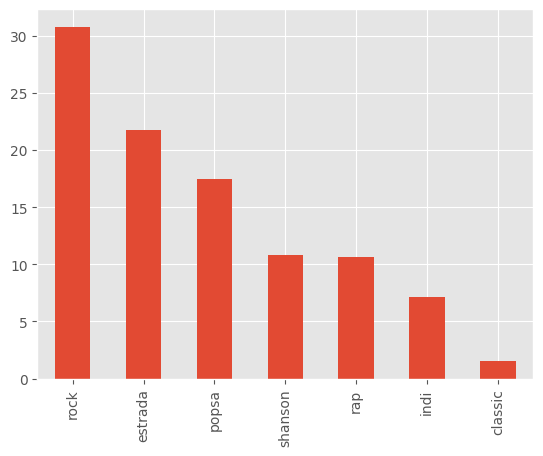

In [ ]:
y.plot(kind='bar')

## 6. –°–∫–æ–ª—å–∫–æ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª–µ–π –ø–∏—à—É—Ç –º—É–∑—ã–∫—É –≤ —Ä–∞–∑–Ω—ã—Ö –∂–∞–Ω—Ä–∞—Ö?

In [ ]:
df_agg = df.groupby('performer')['music_style'].agg(['nunique'])
(df_agg > 1).sum()

nunique    0
dtype: int64

## 7. –°–∫–æ–ª—å–∫–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –ø–æ–¥ –≤–∏–¥–µ–æ —Å likeCount > 100000 –∏ Commentators_uniq > 50

In [ ]:
df_like = df[df['likeCount'] > 100000]
df_like_comm = df_like[df['commentators_uniq'] > 50]
df_like_comm['viewCount'].mean()

<ipython-input-159-2d1bce001b95>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_like_comm = df_like[df['commentators_uniq'] > 50]


39326558.901869155

In [ ]:
new_df = df[(df['likeCount'] > 100000)&(df['commentators_uniq'] > 50)]
new_df['viewCount'].mean()

39326558.901869155

## 8. –í—ã–≤–µ–¥–∏—Ç–µ 5% —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª–µ–π. –í –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ä—ã –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ä–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –º–µ–¥–∏–∞–Ω–Ω—ã–º —á–∏—Å–ª–æ–º –ª–∞–π–∫–æ–≤ –∏ –¥–∏–∑–ª–∞–π–∫–æ–≤. –û—Ü–µ–Ω–∫—É –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ —Å—Ç—Ä–æ–π—Ç–µ —Ç–æ–ª—å–∫–æ –ø–æ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—è–º, —Å–æ–±—Ä–∞–≤—à–∏–º –≤ —Å—É–º–º–µ –±–æ–ª—å—à–µ 100000 –ª–∞–π–∫–æ–≤.

In [ ]:
df_likes = df[df['likeCount'] > 100000]

df_performers = df_likes.groupby('performer')[['likeCount', 'dislikeCount']].median()
df_performers

likeCount  dislikeCount
performer                                 
2–º–∞—à–∏               212909.0       24583.0
classical_channel   271070.5       10307.5
face                405493.0       54433.0
feduk               381360.0       44912.0
gazgolder           192971.0       16075.0
iowa                159995.0       15828.0
johnyboy            135204.0       17801.0
loboda              163510.0       34707.0
lone                196011.5       16396.0
miyagi&—ç–Ω–¥—à–ø–∏–ª—å     744964.0       43281.0
noizemc             136037.0       16491.0
oxxxymiron          185535.0       10925.5
pharaon             193710.0       29281.5
serebro             155140.0       13793.0
–∞–Ω—Ç–æ—Ö–∞_–º—Å           141484.0        5090.0
–±–∞—Ä—Å–∫–∏—Ö             165074.0       19383.5
–±–∏–ª–∞–Ω               273660.0       26857.0
–±—É–∑–æ–≤–∞              196820.5       93109.5
–≤–∞–ª–µ—Ä–∏—è             105405.0        2458.0
–≤–∏–∞_–≥—Ä–∞             114552.0       14166.0
–≥–∞–≥–∞—Ä–∏–Ω–∞            129804.5       20151.0
–∑–≤–µ—Ä–∏               170768.0        9227.0
–∫–∞—Ä–∞—É–ª–æ–≤–∞           119438.0        6829.0
–∫–∏–Ω–æ                138371.0        7608.0
–∫–∏–ø–µ–ª–æ–≤             193033.0       17828.0
–∫–∏—Ä–∫–æ—Ä–æ–≤            377957.0      348770.0
–∫–æ–∫–∞                149350.5        6795.5
–∫—Ä–∏–¥                248318.0       16877.0
–ª–∞–∑–∞—Ä–µ–≤             201703.0       28853.0
–ª–µ–Ω–∏–Ω–≥—Ä–∞–¥           200555.0       39620.5
–ª–æ–ª–∏—Ç–∞              102636.0       10491.0
–ª—Å–ø                 349399.5       12049.5
–º–∞–∫s–∏–º              115186.0        6526.0
–º–∞–ª—å–±—ç–∫             257428.0       12013.0
–º–æ–Ω–µ—Ç–æ—á–∫–∞           153159.0       32478.0
–º–æ—Ç                 196179.0       15640.0
–Ω—é—à–∞                122264.0       11359.0
–ø–æ—à–ª–∞—è_–º–æ–ª–ª–∏        154171.0       27107.0
—Ä—É–∫–∏_–≤–≤–µ—Ä—Ö          306045.5       19916.5
—Ç–∏–º–∞—Ç–∏              211208.0       42211.0
—Ö–∞—Å–∫–∏               114810.0       12159.0
—ç–ª–¥–∂–µ–π              203876.0       42829.0

In [ ]:
df_performers['popularity'] = df_likes.groupby('performer')['likeCount'].median() - df_likes.groupby('performer')['dislikeCount'].median()
df_performers

likeCount  dislikeCount  popularity
performer                                             
2–º–∞—à–∏               212909.0       24583.0    188326.0
classical_channel   271070.5       10307.5    260763.0
face                405493.0       54433.0    351060.0
feduk               381360.0       44912.0    336448.0
gazgolder           192971.0       16075.0    176896.0
iowa                159995.0       15828.0    144167.0
johnyboy            135204.0       17801.0    117403.0
loboda              163510.0       34707.0    128803.0
lone                196011.5       16396.0    179615.5
miyagi&—ç–Ω–¥—à–ø–∏–ª—å     744964.0       43281.0    701683.0
noizemc             136037.0       16491.0    119546.0
oxxxymiron          185535.0       10925.5    174609.5
pharaon             193710.0       29281.5    164428.5
serebro             155140.0       13793.0    141347.0
–∞–Ω—Ç–æ—Ö–∞_–º—Å           141484.0        5090.0    136394.0
–±–∞—Ä—Å–∫–∏—Ö             165074.0       19383.5    145690.5
–±–∏–ª–∞–Ω               273660.0       26857.0    246803.0
–±—É–∑–æ–≤–∞              196820.5       93109.5    103711.0
–≤–∞–ª–µ—Ä–∏—è             105405.0        2458.0    102947.0
–≤–∏–∞_–≥—Ä–∞             114552.0       14166.0    100386.0
–≥–∞–≥–∞—Ä–∏–Ω–∞            129804.5       20151.0    109653.5
–∑–≤–µ—Ä–∏               170768.0        9227.0    161541.0
–∫–∞—Ä–∞—É–ª–æ–≤–∞           119438.0        6829.0    112609.0
–∫–∏–Ω–æ                138371.0        7608.0    130763.0
–∫–∏–ø–µ–ª–æ–≤             193033.0       17828.0    175205.0
–∫–∏—Ä–∫–æ—Ä–æ–≤            377957.0      348770.0     29187.0
–∫–æ–∫–∞                149350.5        6795.5    142555.0
–∫—Ä–∏–¥                248318.0       16877.0    231441.0
–ª–∞–∑–∞—Ä–µ–≤             201703.0       28853.0    172850.0
–ª–µ–Ω–∏–Ω–≥—Ä–∞–¥           200555.0       39620.5    160934.5
–ª–æ–ª–∏—Ç–∞              102636.0       10491.0     92145.0
–ª—Å–ø                 349399.5       12049.5    337350.0
–º–∞–∫s–∏–º              115186.0        6526.0    108660.0
–º–∞–ª—å–±—ç–∫             257428.0       12013.0    245415.0
–º–æ–Ω–µ—Ç–æ—á–∫–∞           153159.0       32478.0    120681.0
–º–æ—Ç                 196179.0       15640.0    180539.0
–Ω—é—à–∞                122264.0       11359.0    110905.0
–ø–æ—à–ª–∞—è_–º–æ–ª–ª–∏        154171.0       27107.0    127064.0
—Ä—É–∫–∏_–≤–≤–µ—Ä—Ö          306045.5       19916.5    286129.0
—Ç–∏–º–∞—Ç–∏              211208.0       42211.0    168997.0
—Ö–∞—Å–∫–∏               114810.0       12159.0    102651.0
—ç–ª–¥–∂–µ–π              203876.0       42829.0    161047.0

In [ ]:
q = df_performers['popularity'].quantile(0.95)
q

337304.9

In [ ]:
df_performers[df_performers['popularity'] > q]['popularity'].sort_values(ascending=False)

performer
miyagi&—ç–Ω–¥—à–ø–∏–ª—å    701683.0
face               351060.0
–ª—Å–ø                337350.0
Name: popularity, dtype: float64